In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import set_config
set_config(transform_output='pandas')

In [2]:
fpath = pd.read_csv('Data/cust_seg.csv')
df = fpath[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio']]
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


In [4]:
mode = df['Defaulted'].mode()[0]
df['Defaulted'].fillna(mode, inplace=True)
df.isna().sum()

C:\Users\wkyle\AppData\Local\Temp\ipykernel_24080\1775927825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Defaulted'].fillna(mode, inplace=True)


Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [5]:
x_scaled = StandardScaler().fit_transform(df)
x_scaled
     

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.523797,-0.576525
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.523797,0.391387
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.909138,1.597554
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.523797,-0.576525
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.523797,-0.442507
...,...,...,...,...,...,...,...,...
845,-0.999093,-0.766349,-0.526415,-0.536737,-0.484243,-0.547213,-0.523797,-0.502070
846,-0.874664,0.312122,-0.231164,-0.329054,-0.573202,-0.311403,-0.523797,-0.472288
847,-1.247951,2.469066,-1.264543,-0.744419,0.576666,0.038633,1.909138,3.458923
848,-0.376947,-0.766349,0.506963,-0.484816,-0.687577,-0.701476,-0.523797,-1.082817


C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

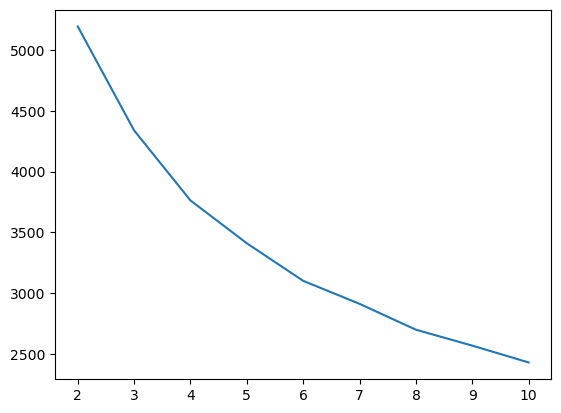

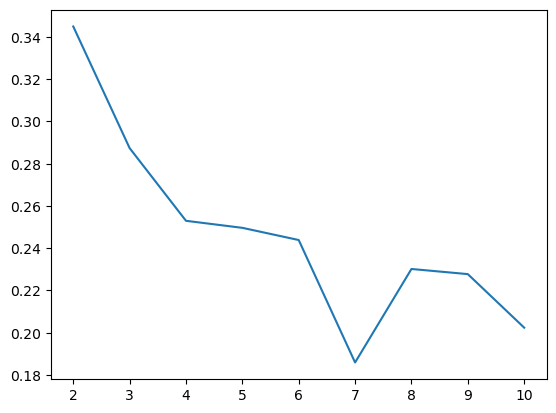

In [6]:
ks = range(2, 11)

inertias = []
sils = []

for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(x_scaled)
  inertias.append(model.inertia_)
  sils.append(silhouette_score(x_scaled, model.labels_))

plt.plot(ks, inertias)

plt.show()

plt.plot(ks, sils)


In [10]:
# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=2, n_init= 'auto', random_state=42)
kmeans.fit(x_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()


C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\wkyle\AppData\Local\Temp\ipykernel_24080\1116618888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,0
2,33,2,10,57,6.111,5.802,1.0,20.9,1
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,0


In [11]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,35.644306,1.627145,9.472699,47.447738,1.18825,2.597752,0.001560,8.326365
1,1,33.143541,1.966507,5.784689,44.306220,2.76856,4.554057,0.870813,15.831100


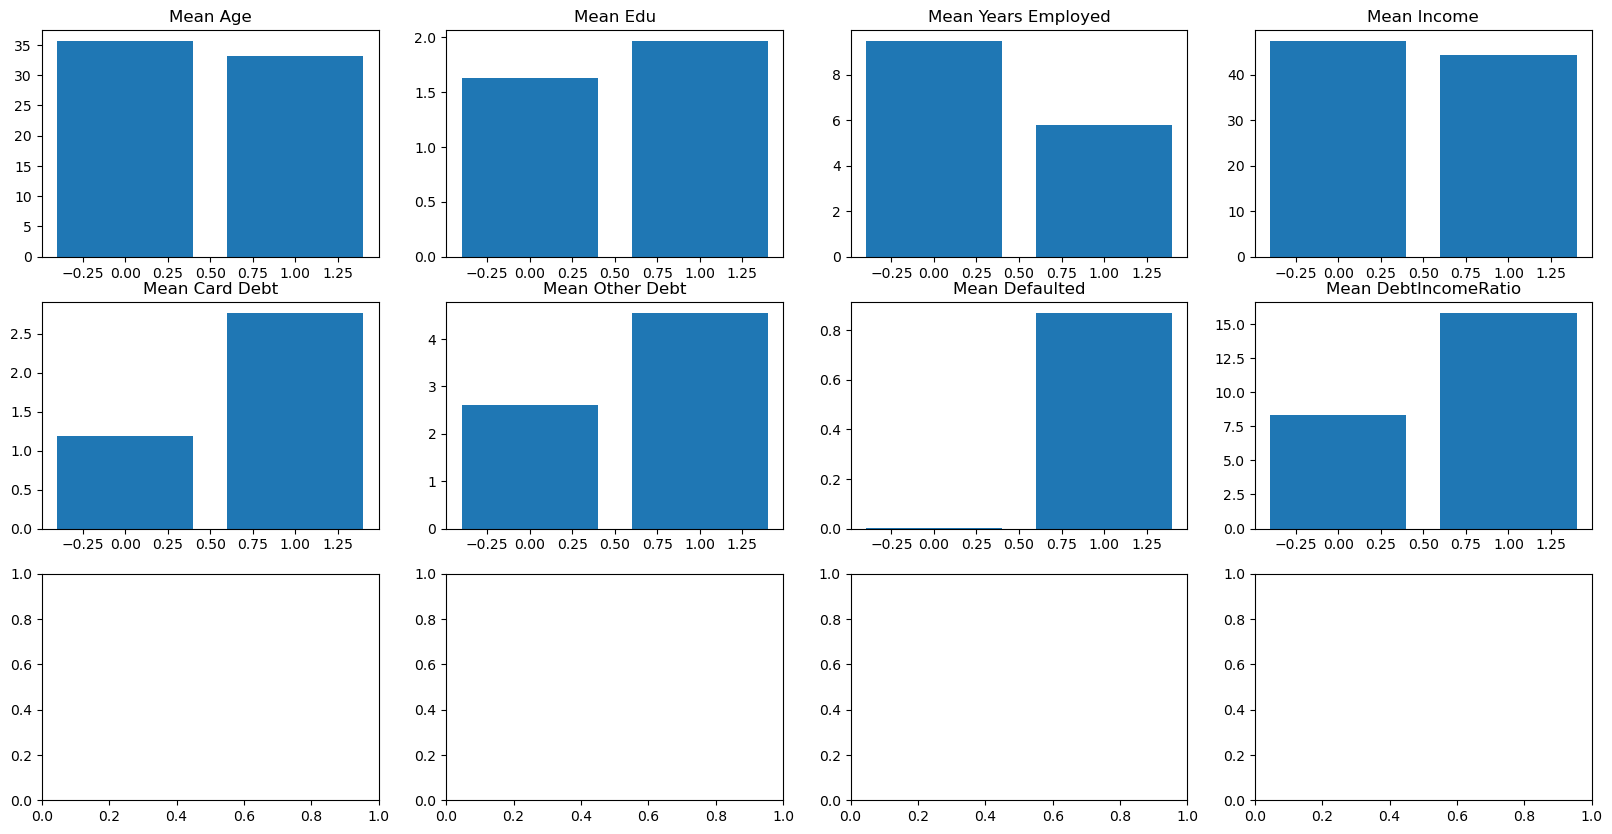

In [12]:
# Visualize means 
fig, axes = plt.subplots(3,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

# Summary
- Cluster 0 shows that the average age of customers ranging to 35 meaning these interested customers are older.
- Cluster 1 shows the average age of customers ranging to under 35 years meaning these interested customers are much younger.
- Customers with a lower DebtIncomeRatio are of older age and could prefer credit cards tailored to their financial positivty, meaning they may prefer higher ratio cards of spending availability.
- Customers with a higher DebtIncomeRatio are of younger age and could prefer credit cards with a lower spending ratio but also higher rewards available for maintaining good credit scores.
- Customers with a higher average income are of older age and could benefit from higher rated credit cards with a less restricting spending limits that fit their threshold of income to spend on credit.
- Customers with a lower average income are of younger age and could benefit from lower to medium rated credit cards with a higher restricted spending limit that tailor to fit their threshold of income to spend on credit.
- Customers with higher credit card debt may benefit from a minimum requirement credit card that can help their personal finances being more in debt.
- Customers with lower credit card debt may benefit from a higher requirement credit card that can help their personal finances being less in debt.
  
